<a href="https://colab.research.google.com/github/TommML/road_sign/blob/master/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import os
import datetime


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from skimage import color ,exposure
from sklearn.metrics import accuracy_score


%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
ls

drive/  sample_data/


In [0]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three


In [0]:
ls

road_sign/


In [0]:
cd 'road_sign/data'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/road_sign/data


In [0]:
train = pd.read_pickle('train.p')

In [0]:
test=pd.read_pickle('test.p')


In [0]:
X_train,y_train=train['features'],train['labels']
X_test,y_test=test['features'],test['labels']

In [0]:
if y_train.ndim ==1: y_train =to_categorical(y_train)
if y_test.ndim ==1: y_test =to_categorical(y_test)

In [0]:
input_shape=X_train.shape[1:]
num_classes=y_train.shape[1]

In [0]:
model=Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    Flatten(),
    Dense(num_classes,activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 11.1056 - accuracy: 0.7803


In [0]:
def get_cnn_v1(input_shape,num_classes):
  return Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    Flatten(),
    Dense(num_classes,activation='softmax'),
])

def train_model(model,X_train,y_train,params_fit={}):
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  model.fit(X_train,y_train) 

  logdir=os.path.join("logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback=tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  model.fit(
      X_train,
      y_train,
      batch_size=params_fit.get('batch_size',128),
      epochs=params_fit.get('epochs',5),
      verbose=params_fit.get('verbose',1),
      validation_data=params_fit.get('validation_data',(X_train,y_train)),
      callbacks=[tensorboard_callback]
  )  
  return model

In [0]:
model=get_cnn_v1(input_shape,num_classes)
model_trained=train_model(model,X_train,y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 7.2041 - accuracy: 0.7989
Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1820 - accuracy: 0.9542 - val_loss: 0.1185 - val_accuracy: 0.9727
Epoch 2/5
272/272 [==============================] - 3s 9ms/step - loss: 0.1113 - accuracy: 0.9719 - val_loss: 0.0787 - val_accuracy: 0.9829
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0807 - accuracy: 0.9806 - val_loss: 0.0615 - val_accuracy: 0.9857
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0655 - accuracy: 0.9845 - val_loss: 0.0592 - val_accuracy: 0.9843
Epoch 5/5
272/272 [==============================] - 3s 9ms/step - loss: 0.0599 - accuracy: 0.9854 - val_loss: 0.0533 - val_accuracy: 0.9885


In [0]:
y_pred_prob=model_trained.predict(X_test)
y_pred_prob

array([[1.6894334e-12, 1.4474126e-05, 8.8190463e-06, ..., 2.6196501e-06,
        3.8734477e-04, 2.9841603e-06],
       [5.4687525e-11, 4.9308775e-05, 9.3293755e-04, ..., 5.6304976e-05,
        1.3986717e-04, 1.9140369e-05],
       [1.2819948e-10, 1.5486908e-04, 1.3059058e-04, ..., 1.5607147e-05,
        1.1976415e-02, 1.3326888e-04],
       ...,
       [8.2253367e-03, 8.5839182e-03, 1.0977949e-02, ..., 1.6510547e-03,
        9.4957737e-04, 2.2597804e-03],
       [4.5624110e-03, 1.0233394e-02, 4.4257361e-03, ..., 1.9660851e-03,
        8.1693882e-04, 1.4581062e-03],
       [2.8518676e-03, 5.4829121e-03, 3.0552354e-03, ..., 2.5053928e-04,
        8.8684057e-04, 1.1477496e-03]], dtype=float32)

In [0]:
y_pred_prob[400]

array([2.10854691e-02, 8.87189388e-01, 1.38685678e-03, 1.55508951e-05,
       8.36533681e-02, 5.42247471e-06, 2.03318617e-13, 1.21932274e-07,
       1.43346506e-06, 4.22742341e-10, 1.73302694e-09, 1.05259175e-14,
       1.70503160e-11, 1.82137833e-10, 4.54968081e-08, 1.19600585e-07,
       6.66217785e-03, 4.67107353e-10, 1.76062032e-09, 5.86656645e-21,
       4.18275219e-16, 6.59003915e-16, 8.24955303e-20, 4.26932134e-15,
       7.23039831e-17, 2.58609236e-12, 1.25436228e-09, 9.55114477e-23,
       3.45433182e-14, 2.45695480e-15, 6.50355390e-24, 2.68586673e-15,
       2.11135823e-13, 7.36260350e-25, 6.90586986e-19, 6.72859936e-19,
       2.36767513e-23, 3.26722482e-24, 7.00417434e-17, 6.47857633e-37,
       1.56568835e-25, 9.35454584e-17, 3.03163500e-13], dtype=float32)

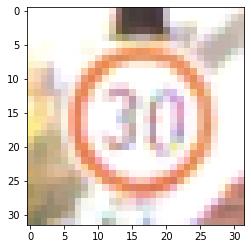

In [0]:
plt.imshow(X_test[400])

In [0]:
df=pd.read_csv('signnames.csv')


In [0]:
df.head()

,a,b
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
labels_dirt=df.to_dict()['b']

In [0]:
def prediction(model_trained,X_test,y_test,scoring=accuracy_score):
  y_test_norm=np.argmax(y_test,axis=1)
  y_pred_prob=model_trained.predict(X_test)
  y_pred =np.argmax(y_pred_prob,axis=1)

  return scoring(y_test_norm,y_pred)

In [0]:
prediction(model_trained,X_test,y_test)

0.8140589569160998

In [0]:
def get_cnn_v11(input_shape,num_classes):
  return Sequential([
        Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
        Flatten(),
        Dense(num_classes,activation='softmax'),             
  ])

model=get_cnn_v11(input_shape,num_classes)
model_trained=train_model(model,X_train,y_train)
prediction(model_trained,X_test,y_test)

1088/1088 [==============================] - 3s 3ms/step - loss: 14.1227 - accuracy: 0.7610
Epoch 1/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2327 - accuracy: 0.9479 - val_loss: 0.1327 - val_accuracy: 0.9701
Epoch 2/5
272/272 [==============================] - 2s 7ms/step - loss: 0.1142 - accuracy: 0.9734 - val_loss: 0.0753 - val_accuracy: 0.9819
Epoch 3/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0748 - accuracy: 0.9830 - val_loss: 0.0550 - val_accuracy: 0.9872
Epoch 4/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0523 - accuracy: 0.9874 - val_loss: 0.0409 - val_accuracy: 0.9916
Epoch 5/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0476 - accuracy: 0.9886 - val_loss: 0.0450 - val_accuracy: 0.9891


0.8249433106575964

In [0]:
def get_cnn_v12(input_shape,num_classes):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  

       Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  

       Conv2D(filters=132,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  

       Flatten(),
       Dense(num_classes,activation='softmax')            

  ])
 

In [0]:
def train_and_predict(model):
  model_trained=train_model(model,X_train,y_train)
  return prediction(model_trained,X_train,y_train)





In [0]:
train_and_predict(get_cnn_v11(input_shape,num_classes))

1088/1088 [==============================] - 3s 3ms/step - loss: 13.7356 - accuracy: 0.7593
Epoch 1/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2483 - accuracy: 0.9371 - val_loss: 0.1519 - val_accuracy: 0.9613
Epoch 2/5
272/272 [==============================] - 2s 7ms/step - loss: 0.1454 - accuracy: 0.9622 - val_loss: 0.1123 - val_accuracy: 0.9733
Epoch 3/5
272/272 [==============================] - 2s 7ms/step - loss: 0.1060 - accuracy: 0.9726 - val_loss: 0.0854 - val_accuracy: 0.9792
Epoch 4/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0803 - accuracy: 0.9795 - val_loss: 0.0556 - val_accuracy: 0.9872
Epoch 5/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0715 - accuracy: 0.9818 - val_loss: 0.0759 - val_accuracy: 0.9807


0.9806603638035576

In [0]:
train_and_predict(get_cnn_v12(input_shape,num_classes))

1088/1088 [==============================] - 4s 3ms/step - loss: 1.2154 - accuracy: 0.7731
Epoch 1/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0991 - accuracy: 0.9768 - val_loss: 0.0589 - val_accuracy: 0.9861
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.0490 - accuracy: 0.9890 - val_loss: 0.0372 - val_accuracy: 0.9924
Epoch 3/5
272/272 [==============================] - 2s 8ms/step - loss: 0.0337 - accuracy: 0.9926 - val_loss: 0.0275 - val_accuracy: 0.9945
Epoch 4/5
272/272 [==============================] - 2s 8ms/step - loss: 0.0289 - accuracy: 0.9928 - val_loss: 0.0249 - val_accuracy: 0.9943
Epoch 5/5
272/272 [==============================] - 2s 8ms/step - loss: 0.0226 - accuracy: 0.9947 - val_loss: 0.0175 - val_accuracy: 0.9963


0.996292996925199

In [0]:
def get_cnn_v13(input_shape,num_classes):
  return Sequential([
       Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  
       Dropout(0.3),

       Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  
       Dropout(0.3),

       Conv2D(filters=132,kernel_size=(3,3),activation='relu',input_shape=input_shape),
       MaxPool2D(),  

       Flatten(),
       Dense(1024,activation='relu'),
       Dropout(0.3),

       Dense(num_classes,activation='softmax')            

  ])

ERROR! Session/line number was not unique in database. History logging moved to new session 61


In [0]:
train_and_predict(get_cnn_v13(input_shape,num_classes))

1088/1088 [==============================] - 4s 4ms/step - loss: 2.3019 - accuracy: 0.4793
Epoch 1/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5178 - accuracy: 0.8434 - val_loss: 0.1884 - val_accuracy: 0.9586
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3613 - accuracy: 0.8920 - val_loss: 0.1190 - val_accuracy: 0.9747
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2766 - accuracy: 0.9177 - val_loss: 0.0767 - val_accuracy: 0.9842
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2243 - accuracy: 0.9324 - val_loss: 0.0666 - val_accuracy: 0.9879
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1941 - accuracy: 0.9432 - val_loss: 0.0429 - val_accuracy: 0.9898


0.9898272938877554

In [0]:
X_train_gray=color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray=color.rgb2gray(X_test).reshape(-1,32,32,1)

In [0]:
model=get_cnn_v13((32,32,1),num_classes)
model_trained=train_model(model,X_train_gray,y_train,params_fit={})
prediction(model_trained,X_test_gray,y_test)

1088/1088 [==============================] - 4s 4ms/step - loss: 1.5849 - accuracy: 0.5481
Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 0.3006 - accuracy: 0.9058 - val_loss: 0.1180 - val_accuracy: 0.9718
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2069 - accuracy: 0.9376 - val_loss: 0.0718 - val_accuracy: 0.9855
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1612 - accuracy: 0.9495 - val_loss: 0.0530 - val_accuracy: 0.9890
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1298 - accuracy: 0.9598 - val_loss: 0.0366 - val_accuracy: 0.9941
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0993 - accuracy: 0.9696 - val_loss: 0.0311 - val_accuracy: 0.9934


0.9383219954648526